# 主題 01-2. 取回訓練好的神經網路

【註】因 TensorFlow 2 已做了一些改變, 例如完全整合了 Keras。到 2021 年的今天, 有一些細節也做了調整。因此我們依新的規範修改了程式。最大的不同是, 以後大家直接安裝 tensorflow 即可, 不用再另外裝 keras。

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 1. 找回我們的神經網路

我們這裡需要把結構和 weights 取回, 要注意的是還需要再 compile 一次, 所以在 complie 中用到的 optimizer 等還是需要告訴 Keras 的。

In [2]:
from tensorflow.keras.models import model_from_json
from tensorflow.keras.optimizers import SGD

In [3]:
model = model_from_json(open('handwriting_model_architecture.json').read())
model.load_weights('handwriting_model_weights.h5')

In [4]:
model.compile(loss='mse', optimizer=SGD(lr=0.1))

## 2. 資料再讀回來

In [5]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

我們只轉測試資料。

In [6]:
x_test = x_test.reshape(10000, 784)

## 3. 找一個來試試

In [7]:
# n_test = 1234

n_test=9487

In [8]:
x = x_test[n_test]

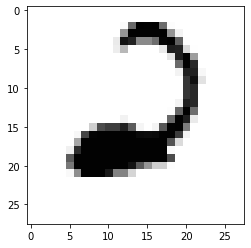

In [9]:
plt.imshow(x.reshape(28,28), cmap='Greys')

In [10]:
np.argmax(model.predict(x.reshape(1,784)), axis=-1)

array([2])